In [0]:
#	Parte 4 – Regressões lineares múltiplas - Método Forward

from google.colab import files
files.upload()

Saving student-mat.csv to student-mat (2).csv


{'student-mat.csv': b'school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3\nGP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6\nGP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6\nGP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10\nGP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15\nGP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10\nGP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15\nGP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11\nGP,F,17,U,GT3

In [0]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


df=pd.read_csv('student-mat.csv')
df=df[df.G3 != 0]

In [0]:
#Regressão linear múltipla sem a presença das variáveis explicativas (G1,G2)

df1=df[['age','absences','G3' ]]
y=df1['G3'] 
x=df1[['age','absences']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sat, 11 May 2019   Prob (F-statistic):           4.67e-05
Time:                        12:31:34   Log-Likelihood:                -914.34
No. Observations:                 357   AIC:                             1835.
Df Residuals:                     354   BIC:                             1846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1991      2.225      7.281      0.000      11.824      20.574
age           -0.2520      0.135     -1.871      0.062      -0.517       0.013
absences      -0.0756      0.021     -3.624      0.000      -0.117      -0.035
==============================================================================
Omnibus:                        4.711   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.347
Skew:                           0.210   Prob(JB):                        0.114
Kurtosis:                       2.660   Cond. No.                         244.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

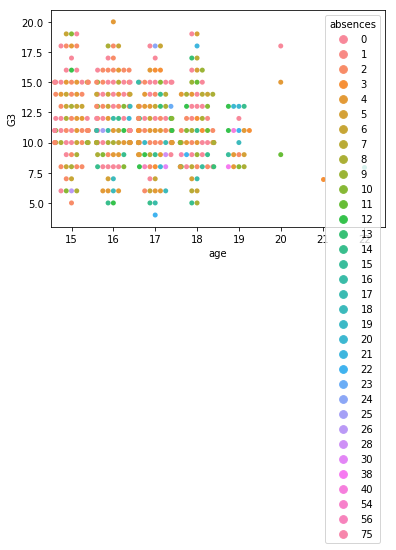

In [0]:

sns.swarmplot(x='age', y='G3', hue='absences', data=df1)

In [0]:
df1 = pd.get_dummies(df, drop_first=True)

In [0]:
df2=df1[['absences','sex_M','G3']]
y=df2['G3'] 
x=df2[['absences','sex_M']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     9.822
Date:                Sat, 11 May 2019   Prob (F-statistic):           7.05e-05
Time:                        12:32:48   Log-Likelihood:                -914.75
No. Observations:                 357   AIC:                             1836.
Df Residuals:                     354   BIC:                             1847.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7727      0.272     43.241      0.000      11.237      12.308
absences      -0.0812      0.020     -3.965      0.000      -0.121      -0.041
sex_M          0.5476      0.335      1.635      0.103      -0.111       1.206
==============================================================================
Omnibus:                        6.565   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.643
Skew:                           0.231   Prob(JB):                       0.0595
Kurtosis:                       2.592   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

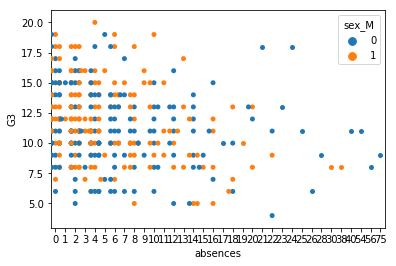

In [0]:
sns.swarmplot(x='absences', y='G3', hue='sex_M', data=df1)

In [0]:

df2=df1[['failures','absences','G3','address_U']]
y=df2['G3'] 
x=df2[['failures', 'absences','address_U']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     16.92
Date:                Sat, 11 May 2019   Prob (F-statistic):           2.72e-10
Time:                        12:35:16   Log-Likelihood:                -900.41
No. Observations:                 357   AIC:                             1809.
Df Residuals:                     353   BIC:                             1824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6757      0.376     31.032      0.000      10.936      12.416
failures      -1.2473      0.243     -5.140      0.000      -1.725      -0.770
absences      -0.0673      0.020     -3.393      0.001      -0.106      -0.028
address_U      0.7834      0.390      2.009      0.045       0.017       1.550
==============================================================================
Omnibus:                        2.993   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.982
Skew:                           0.184   Prob(JB):                        0.225
Kurtosis:                       2.746   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:


df3=df1[['school_MS','address_U','Mjob_health', 'Mjob_services', 'Mjob_teacher', 'failures','schoolsup_yes','higher_yes', 'internet_yes','romantic_yes', 'absences','G3']]
y=df3['G3'] 
x=df3[['school_MS','address_U','Mjob_health','Mjob_services', 'Mjob_teacher', 'failures', 'schoolsup_yes','higher_yes', 'internet_yes','romantic_yes', 'absences']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     9.005
Date:                Sat, 11 May 2019   Prob (F-statistic):           3.77e-14
Time:                        12:35:53   Log-Likelihood:                -879.34
No. Observations:                 357   AIC:                             1783.
Df Residuals:                     345   BIC:                             1829.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.3457      0.951     11.931      0.000       9.475      13.216
school_MS        -0.8163      0.509     -1.604      0.110      -1.817       0.185
address_U         0.3561      0.395      0.901      0.368      -0.422       1.134
Mjob_health       1.2872      0.569      2.262      0.024       0.168       2.407
Mjob_services     1.2015      0.377      3.184      0.002       0.459       1.944
Mjob_teacher      0.2167      0.464      0.466      0.641      -0.697       1.130
failures         -1.1945      0.245     -4.870      0.000      -1.677      -0.712
schoolsup_yes    -2.2154      0.453     -4.889      0.000      -3.107      -1.324
higher_yes        0.2207      0.830      0.266      0.791      -1.413       1.854
internet_yes      0.5058      0.438      1.154      0.249      -0.356       1.368
romantic_yes     -0.0488      0.342     -0.143      0.887      -0.722       0.625
absences         -0.0719      0.020     -3.648      0.000      -0.111      -0.033
==============================================================================
Omnibus:                        3.931   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.510
Skew:                           0.168   Prob(JB):                        0.173
Kurtosis:                       2.650   Cond. No.                         83.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:


dummy=pd.get_dummies(df1['Medu'],drop_first=True)
dummy.columns=['Medu1','Medu2','Medu3','Medu4']


dummy8=pd.get_dummies(df1['Fedu'],drop_first=True)
dummy8.columns=['Fedu1','Fedu2','Fedu3','Fedu4']


df4=pd.concat([df1,dummy,dummy8], axis=1)

df4 = df4.drop(['Medu','Fedu'], axis=1)



df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','Medu1','Medu2','Medu3','Medu4','Fedu1','Fedu2','Fedu3','Fedu4']]
y=df5['G3'] 
x=df5[['Mjob_health', 'Mjob_services', 'failures', 'absences','Medu1','Medu2','Medu3','Medu4','Fedu1','Fedu2','Fedu3','Fedu4']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()






/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     6.420
Date:                Sat, 11 May 2019   Prob (F-statistic):           2.58e-10
Time:                        12:40:23   Log-Likelihood:                -888.32
No. Observations:                 357   AIC:                             1803.
Df Residuals:                     344   BIC:                             1853.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.8346      2.735      5.790      0.000      10.455      21.214
Mjob_health       1.2373      0.587      2.107      0.036       0.082       2.393
Mjob_services     1.1481      0.381      3.012      0.003       0.398       1.898
failures         -1.2519      0.254     -4.927      0.000      -1.752      -0.752
absences         -0.0677      0.020     -3.409      0.001      -0.107      -0.029
Medu1            -3.1031      1.781     -1.742      0.082      -6.606       0.400
Medu2            -2.6518      1.766     -1.502      0.134      -6.124       0.821
Medu3            -2.3243      1.782     -1.305      0.193      -5.829       1.180
Medu4            -1.8890      1.792     -1.054      0.293      -5.414       1.636
Fedu1            -1.6456      2.145     -0.767      0.444      -5.865       2.574
Fedu2            -1.4835      2.137     -0.694      0.488      -5.687       2.720
Fedu3            -1.9937      2.137     -0.933      0.352      -6.198       2.210
Fedu4            -1.3672      2.140     -0.639      0.523      -5.577       2.842
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.819
Skew:                           0.111   Prob(JB):                        0.403
Kurtosis:                       2.729   Cond. No.                         323.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
dummy5=pd.get_dummies(df1['goout'],drop_first=True)
dummy5.columns=['goout2','goout3','goout4','goout5']

dummy6=pd.get_dummies(df1['Dalc'],drop_first=True)
dummy6.columns=['Dalc2','Dalc3','Dalc4','Dalc5']

dummy7=pd.get_dummies(df1['Walc'],drop_first=True)
dummy7.columns=['Walc2','Walc3','Walc4','Walc5']



df4=pd.concat([df1,dummy5,dummy6,dummy7], axis=1)

df4 = df4.drop(['goout','Dalc','Walc'], axis=1)


df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','goout2','goout3','goout4','goout5','Dalc2','Dalc3','Dalc4','Dalc5','Walc2','Walc3','Walc4','Walc5']]
y=df5['G3'] 
x=df5 [['Mjob_health', 'Mjob_services', 'failures', 'absences','goout2','goout3','goout4','goout5','Dalc2','Dalc3','Dalc4','Dalc5','Walc2','Walc3','Walc4','Walc5']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()





/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     5.256
Date:                Sat, 11 May 2019   Prob (F-statistic):           6.63e-10
Time:                        12:41:30   Log-Likelihood:                -884.94
No. Observations:                 357   AIC:                             1804.
Df Residuals:                     340   BIC:                             1870.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4159      0.722     17.189      0.000      10.995      13.837
Mjob_health       1.7957      0.567      3.165      0.002       0.680       2.912
Mjob_services     1.2946      0.369      3.510      0.001       0.569       2.020
failures         -1.2990      0.246     -5.280      0.000      -1.783      -0.815
absences         -0.0555      0.020     -2.823      0.005      -0.094      -0.017
goout2            0.2263      0.754      0.300      0.764      -1.257       1.710
goout3           -0.2535      0.746     -0.340      0.734      -1.721       1.214
goout4           -0.8847      0.780     -1.134      0.258      -2.419       0.650
goout5           -0.8929      0.861     -1.037      0.301      -2.587       0.801
Dalc2             0.0746      0.487      0.153      0.878      -0.883       1.032
Dalc3             0.4092      0.708      0.578      0.564      -0.984       1.802
Dalc4            -0.7914      1.101     -0.719      0.473      -2.957       1.374
Dalc5            -1.0390      1.298     -0.801      0.424      -3.591       1.513
Walc2            -0.4198      0.448     -0.938      0.349      -1.300       0.461
Walc3            -0.6539      0.489     -1.337      0.182      -1.616       0.308
Walc4            -1.1760      0.620     -1.895      0.059      -2.396       0.044
Walc5             0.3992      0.923      0.432      0.666      -1.417       2.215
==============================================================================
Omnibus:                        1.713   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.793
Skew:                           0.141   Prob(JB):                        0.408
Kurtosis:                       2.797   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:


dummy2=pd.get_dummies(df1['traveltime'],drop_first=True)
dummy2.columns=['traveltime2','traveltime3','traveltime4']

dummy3=pd.get_dummies(df1['studytime'],drop_first=True)
dummy3.columns=['studytime2','studytime3','studytime4']

dummy4=pd.get_dummies(df1['freetime'],drop_first=True)
dummy4.columns=['freetime2','freetime3','freetime4','freetime5']



df4=pd.concat([df1,dummy2,dummy3,dummy4], axis=1)

df4 = df4.drop(['traveltime','studytime','freetime'], axis=1)


df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','traveltime2','traveltime3','traveltime4','studytime2','studytime3','studytime4','freetime2','freetime3','freetime4','freetime5']]
y=df5['G3'] 
x=df5 [['Mjob_health', 'Mjob_services', 'failures', 'absences','traveltime2','traveltime3','traveltime4','studytime2','studytime3','studytime4','freetime2','freetime3','freetime4','freetime5']]

X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     6.056
Date:                Sat, 11 May 2019   Prob (F-statistic):           1.00e-10
Time:                        12:41:39   Log-Likelihood:                -884.86
No. Observations:                 357   AIC:                             1800.
Df Residuals:                     342   BIC:                             1858.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.8016      0.858     13.760      0.000      10.115      13.489
Mjob_health       1.4121      0.573      2.467      0.014       0.286       2.538
Mjob_services     1.1465      0.367      3.126      0.002       0.425       1.868
failures         -1.3411      0.244     -5.491      0.000      -1.821      -0.861
absences         -0.0622      0.020     -3.158      0.002      -0.101      -0.023
traveltime2      -0.3274      0.362     -0.905      0.366      -1.039       0.384
traveltime3       0.2240      0.721      0.311      0.756      -1.194       1.642
traveltime4      -1.0862      1.152     -0.943      0.346      -3.352       1.179
studytime2       -0.2967      0.387     -0.766      0.444      -1.058       0.465
studytime3        1.0030      0.509      1.971      0.050       0.002       2.004
studytime4        0.8347      0.693      1.205      0.229      -0.528       2.198
freetime2         0.6599      0.825      0.800      0.424      -0.962       2.282
freetime3        -0.2885      0.778     -0.371      0.711      -1.820       1.243
freetime4        -0.0695      0.788     -0.088      0.930      -1.620       1.481
freetime5         0.9096      0.888      1.025      0.306      -0.837       2.656
==============================================================================
Omnibus:                        2.253   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.047
Skew:                           0.096   Prob(JB):                        0.359
Kurtosis:                       2.683   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:

dummy3=pd.get_dummies(df1['studytime'],drop_first=True)
dummy3.columns=['studytime2','studytime3','studytime4']

dummy9=pd.get_dummies(df1['famrel'],drop_first=True)
dummy9.columns=['famrel2','famrel3','famrel4','famrel5']


dummy10=pd.get_dummies(df1['health'],drop_first=True)
dummy10.columns=['health2','health3','health4','health5']






df4=pd.concat([df1,dummy3,dummy9,dummy10], axis=1)

df4 = df4.drop(['studytime','famrel','health'], axis=1)


df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','studytime3','famrel2','famrel3','famrel4','famrel5','health2','health3','health4','health5']]
y=df5['G3'] 
x=df5[['Mjob_health', 'Mjob_services', 'failures', 'absences','studytime3','famrel2','famrel3','famrel4','famrel5','health2','health3','health4','health5']]
X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     6.323
Date:                Sat, 11 May 2019   Prob (F-statistic):           1.02e-10
Time:                        12:41:49   Log-Likelihood:                -886.04
No. Observations:                 357   AIC:                             1800.
Df Residuals:                     343   BIC:                             1854.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.1631      1.150     11.449      0.000      10.902      15.424
Mjob_health       1.6660      0.566      2.943      0.003       0.553       2.779
Mjob_services     1.1954      0.369      3.239      0.001       0.470       1.921
failures         -1.2905      0.240     -5.378      0.000      -1.762      -0.819
absences         -0.0632      0.019     -3.250      0.001      -0.101      -0.025
studytime3        1.1261      0.432      2.608      0.009       0.277       1.975
famrel2          -0.1514      1.378     -0.110      0.913      -2.862       2.559
famrel3          -0.8512      1.203     -0.708      0.480      -3.217       1.514
famrel4          -0.7346      1.162     -0.632      0.528      -3.021       1.552
famrel5          -0.2904      1.179     -0.246      0.806      -2.610       2.029
health2          -0.4185      0.662     -0.632      0.528      -1.721       0.884
health3          -1.2665      0.562     -2.256      0.025      -2.371      -0.162
health4          -1.1888      0.604     -1.967      0.050      -2.378       0.000
health5          -1.1035      0.523     -2.112      0.035      -2.131      -0.076
==============================================================================
Omnibus:                        3.133   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.102
Skew:                           0.187   Prob(JB):                        0.212
Kurtosis:                       2.738   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:

dummy3=pd.get_dummies(df1['studytime'],drop_first=True)
dummy3.columns=['studytime2','studytime3','studytime4']


dummy10=pd.get_dummies(df1['health'],drop_first=True)
dummy10.columns=['health2','health3','health4','health5']


df4=pd.concat([df1,dummy3,dummy10], axis=1)

df4 = df4.drop(['studytime','health'], axis=1)


df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','studytime3','health3','health4','health5']]
y=df5['G3'] 
x=df5[['Mjob_health', 'Mjob_services', 'failures', 'absences','studytime3','health3','health4','health5']]
X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     9.954
Date:                Sat, 11 May 2019   Prob (F-statistic):           1.70e-12
Time:                        12:41:56   Log-Likelihood:                -887.61
No. Observations:                 357   AIC:                             1793.
Df Residuals:                     348   BIC:                             1828.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4050      0.368     33.694      0.000      11.681      13.129
Mjob_health       1.6915      0.558      3.030      0.003       0.594       2.789
Mjob_services     1.2085      0.367      3.297      0.001       0.488       1.929
failures         -1.2701      0.239     -5.324      0.000      -1.739      -0.801
absences         -0.0646      0.019     -3.336      0.001      -0.103      -0.026
studytime3        1.1197      0.428      2.617      0.009       0.278       1.961
health3          -1.1469      0.462     -2.483      0.013      -2.055      -0.239
health4          -1.0237      0.511     -2.002      0.046      -2.029      -0.018
health5          -0.9400      0.415     -2.265      0.024      -1.756      -0.124
==============================================================================
Omnibus:                        2.884   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.736
Skew:                           0.153   Prob(JB):                        0.255
Kurtosis:                       2.700   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# Regressão linear múltipla com a presença das variáveis explicativas (G1,G2)
  
dummy3=pd.get_dummies(df1['studytime'],drop_first=True)
dummy3.columns=['studytime2','studytime3','studytime4']


dummy10=pd.get_dummies(df1['health'],drop_first=True)
dummy10.columns=['health2','health3','health4','health5']


df4=pd.concat([df1,dummy3,dummy10], axis=1)

df4 = df4.drop(['studytime','health'], axis=1)


df5=df4[['Mjob_health', 'Mjob_services', 'failures', 'absences','G3','studytime3','health3','health4','health5','G1','G2',]]
y=df5['G3'] 
x=df5[['Mjob_health', 'Mjob_services', 'failures', 'absences','studytime3','health3','health4','health5','G1','G2',]]
X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     511.7
Date:                Sat, 11 May 2019   Prob (F-statistic):          1.48e-200
Time:                        12:45:16   Log-Likelihood:                -431.86
No. Observations:                 357   AIC:                             885.7
Df Residuals:                     346   BIC:                             928.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4581      0.213      2.149      0.032       0.039       0.878
Mjob_health       0.1728      0.158      1.094      0.275      -0.138       0.483
Mjob_services     0.0688      0.104      0.661      0.509      -0.136       0.274
failures          0.0183      0.070      0.262      0.793      -0.119       0.156
absences         -0.0116      0.006     -2.097      0.037      -0.023      -0.001
studytime3        0.0303      0.121      0.250      0.803      -0.208       0.268
health3          -0.1077      0.131     -0.825      0.410      -0.364       0.149
health4          -0.0506      0.144     -0.352      0.725      -0.334       0.232
health5          -0.2511      0.117     -2.152      0.032      -0.481      -0.022
G1                0.1175      0.032      3.682      0.000       0.055       0.180
G2                0.8715      0.033     26.056      0.000       0.806       0.937
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                2.047
Skew:                           0.112   Prob(JB):                        0.359
Kurtosis:                       3.296   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:


dummy10=pd.get_dummies(df1['health'],drop_first=True)
dummy10.columns=['health2','health3','health4','health5']


df4=pd.concat([df1,dummy10], axis=1)

df4 = df4.drop(['health'], axis=1)


df5=df4[[ 'absences','G3','health5','G1','G2']]
y=df5['G3'] 
x=df5[['absences','health5','G1','G2']]
X1=sm.add_constant(x)                                                
model = sm.OLS(y,X1).fit()          
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 11 May 2019   Prob (F-statistic):          6.12e-209
Time:                        12:47:15   Log-Likelihood:                -432.97
No. Observations:                 357   AIC:                             875.9
Df Residuals:                     352   BIC:                             895.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3990      0.179      2.224      0.027       0.046       0.752
absences      -0.0113      0.005     -2.075      0.039      -0.022      -0.001
health5       -0.1883      0.090     -2.091      0.037      -0.365      -0.011
G1             0.1152      0.031      3.662      0.000       0.053       0.177
G2             0.8776      0.033     26.753      0.000       0.813       0.942
==============================================================================
Omnibus:                        2.761   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.595
Skew:                           0.131   Prob(JB):                        0.273
Kurtosis:                       3.325   Cond. No.                         74.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""